# Changing Basis (Coordinate Systems)

In [222]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
%matplotlib notebook

## Definition Basis

Basis is a set of n vectors that:
* are not linear combinations of each oehter (linearly independent)
This means that $b_3$ cannot be written as $$a_1b_1 + a_2b_2$$
* span space, which is n-dimensional

Basis does NOT have to be:
* unit vectors (length 1)
* orthogonal (at 90 degrees)
<p>

But everything is going to be easier if they are.  So if at all possible you would like to construct what is called an orthonormal basis vector set.
<p>

Any mapping that we do from one set of basis vectors, one coordinate system to another set of basis vectors, another coordinate system, keeps the vector space being a regularly spaced grid, where our original rules of vector addition and multiplication by a scaler still work. It doesn't warp or fold space, which is what the linear bit in linear algebra means geometrically.

In [144]:
ehat1 = np.array([1., 0.])
ehat2 = np.array([0., 1.])
re = np.array([3., 4.])
b1e = np.array([2., 1.])
b2e = np.array([-2., 4.])

## Example

<IPython.core.display.Javascript object>


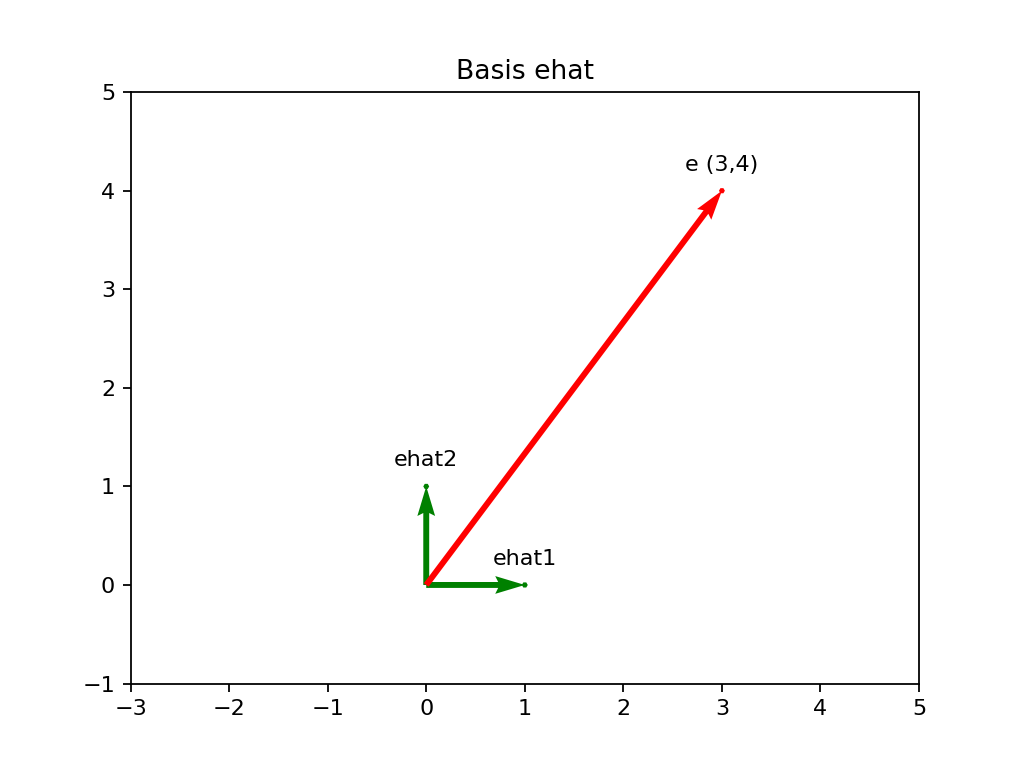

In [223]:
plt.figure()

ax = plt.gca()
ax.set_xlim([-3,5])
ax.set_ylim([-1,5])
ax.set_aspect('equal')

ehat1_quiver = ax.quiver(0, 0, ehat1[0], ehat1[1], angles='xy', scale_units='xy', scale=1, color='g')
ax.quiverkey(ehat1_quiver, ehat1[0], ehat1[1], 0, 'ehat1', coordinates='data')

ehat2_quiver = ax.quiver(0, 0, ehat2[0], ehat2[1], angles='xy', scale_units='xy', scale=1, color='g')
ax.quiverkey(ehat2_quiver, ehat2[0], ehat2[1], 0, 'ehat2', coordinates='data')

r_quiver = ax.quiver(0, 0, re[0], re[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiverkey(r_quiver, re[0], re[1], 0, 'e (3,4)', coordinates='data')

plt.title('Basis ehat')
plt.show()

<IPython.core.display.Javascript object>


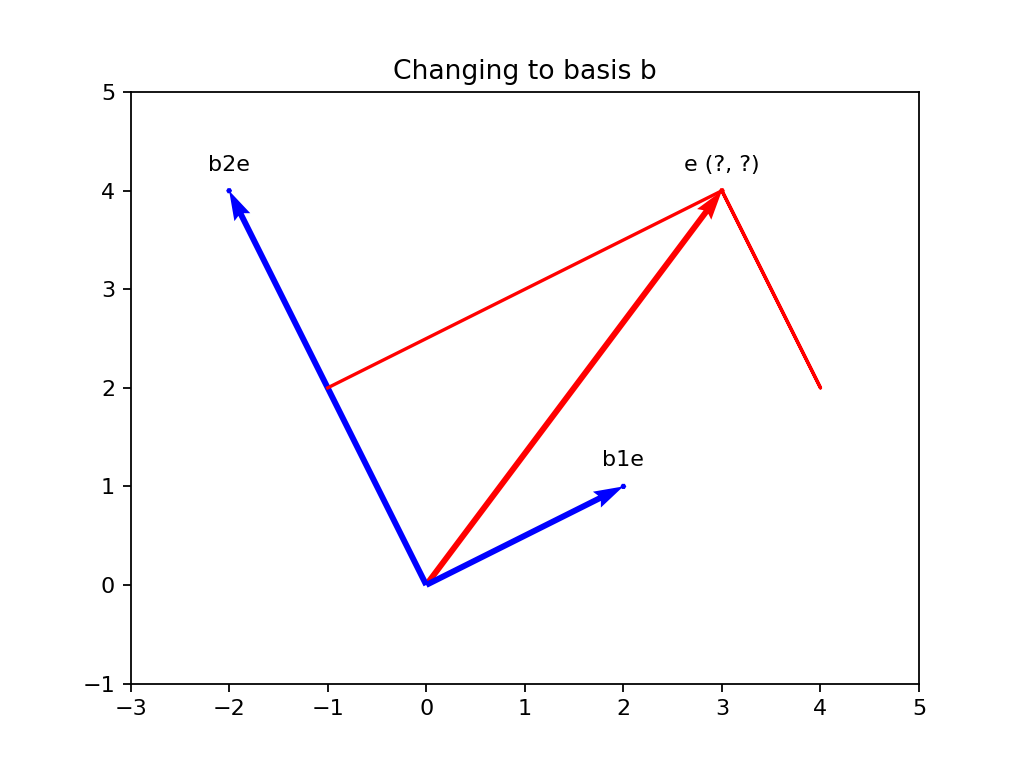

In [247]:
fig = plt.figure()

ax = plt.gca()
ax.set_xlim([-3,5])
ax.set_ylim([-1,5])
ax.set_aspect('equal')

r_quiver = ax.quiver(0, 0, re[0], re[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiverkey(r_quiver, re[0], re[1], 0, 'e (?, ?)', coordinates='data')

b1e_quiver = ax.quiver(0, 0, b1e[0], b1e[1], angles='xy', scale_units='xy', scale=1, color='b')
ax.quiverkey(b1e_quiver, b1e[0], b1e[1], 0, 'b1e', coordinates='data')

b2e_quiver = ax.quiver(0, 0, b2e[0], b2e[1], angles='xy', scale_units='xy', scale=1, color='b')
ax.quiverkey(b2e_quiver, b2e[0], b2e[1], 0, 'b2e', coordinates='data')

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

vector_projection_b1 = b1e*(np.dot(b1e, r)/(np.dot(b1e, b1e)))
vector_projection_b2 = b2e*(np.dot(b2e, r)/(np.dot(b2e, b2e)))
data = np.array([[re[0], vector_projection_b1[0], re[0], vector_projection_b2[0]],
                  [re[1], vector_projection_b1[1], re[1], vector_projection_b2[1]]])
l, = plt.plot([], [], 'r-')
line_ani = animation.FuncAnimation(fig, update_line, 25, fargs=(data, l),
                                   interval=500, blit=True, repeat=False)

plt.title('Changing to basis b')
plt.show()

In [233]:
vector_projection

array([4, 2])

## Vector projection to calculate the new coordinates

<font color='red'>
The following method to calculate the new coordinates of e using basis b, only works when the vectors making up the coordinate systems are orthogonal to each other. When the new basis vectors aren't orthogonal, then to do the change from one base to another, we won't just be able to use the dot product anymore. We'll have to use matrices instead, which we'll meet in the next module.
</font>

How do I check if these two new basis vectors are at 90 degrees to each other?  Well remember:
$$ r.s = |r||s|cos \theta$$
This means that:
$$ cos \theta = \frac{r.s}{|r||s|}$$
Remember also that the cosine of a right angle is zero.

In [156]:
# Let's use the built in numpy functions
# Dot product np.dot
# Size of vector np.linalg.norm
cos_theta = np.dot(b1e, b2e) / (np.linalg.norm(b1e), np.linalg.norm(b2e))
cos_theta

array([ 0.,  0.])

In [155]:
print 'b1e and b2e are orthogonal since the cosine of the angle is', cos_theta

b1e and b2e are orthogonal since the cosine of the angle is [ 0.  0.]


Now let's find what rb is.
Remember the vector projection or s onto r is:
$$r\frac{r.s}{|r||r|}$$
Translating the latter to re onto b1e:
$$b1e\frac{b1e.re}{|b1e||b1e|}$$
or
$$b1e\frac{b1e.re}{|b1e|^2}$$

In [163]:
rb1 = (np.dot(b1e, re)/np.linalg.norm(b1e)**2)
rb2 = (np.dot(b2e, re)/np.linalg.norm(b2e)**2)

In [164]:
rb = np.array([rb1, rb2])

In [165]:
rb

array([ 2. ,  0.5])

In [166]:
b1e * rb1

array([ 4.,  2.])

In [167]:
b2e * rb2

array([-1.,  2.])

In [168]:
b1e * rb1 + b2e * rb2

array([ 3.,  4.])

### Quick way to change basis

In [185]:
import fractions
np.set_printoptions(formatter={'all':lambda x: str(fractions.Fraction(x).limit_denominator())})

In [206]:
v = np.array([1., 1., 2., 3.])
b1 = np.array([1., 0., 0., 0.])
b2 = np.array([0., 2., -1., 0.])
b3 = np.array([0., 1., 2., 0.])
b4 = np.array([0., 0., 0., 30.])

In [207]:
a = round(np.dot(b1, v)/np.linalg.norm(b1)**2, 10)
b = round(np.dot(b2, v)/np.linalg.norm(b2)**2, 10)
c = round(np.dot(b3, v)/np.linalg.norm(b3)**2, 10)
d = round(np.dot(b4, v)/np.linalg.norm(b4)**2, 10)
np.array([a, b, c, d])

array([1, 0, 1, 1/10])